# Assignment
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

### Importing Library's

In [583]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score


In [584]:
# setting options to library's
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
plt.rcParams.update({'figure.max_open_warning': 0})
warnings.filterwarnings('ignore')

In [585]:
# Importing the data for analysis
df = pd.read_csv('train.csv')

### Data Understanding

In [586]:
#Checking Header and Footer
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [587]:
df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [588]:
#Checking feature Size and Count of Records
df.shape

(1460, 81)

In [589]:
#Checking Columns and their types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [590]:
df.isnull().sum()    

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

**Summary**:
1. There are 1460 rows and 81 columns in dataframe
2. These 81 columns comprises of both dimensions (categorical value) and measures (numeric value)
3. The dataset is not clean, i.e. consists of missing values as well

### Exploratory Data Analysis

In [591]:
# Check Unique value columns in data frame for removal
for col in df:
    if df[col].nunique() == 1460 :
        print(col)

Id


In [592]:
# Removing identifier field
df.drop(['Id'], axis=1, inplace=True)

In [593]:
# Check Null values in columns
df.isnull().sum()[df.isnull().sum()!=0]/1460*100 

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [594]:
#Dropping Features which having more than 80% of Null values that is Alley,PoolQC,Fence,MiscFeature
df.drop(['Alley','PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [595]:
#Dropping FireplaceQu Contains 47% of Null values 
df.drop(['FireplaceQu'], axis=1, inplace=True)

In [596]:
#Dropping LotFrontage Contains 17% of Null values and able to see field is not much usefull for analysis
df.drop(['LotFrontage'], axis=1, inplace=True)

In [597]:
# Check Null values in columns
df.isnull().sum()[df.isnull().sum()!=0]/1460*100 

MasVnrType      0.547945
MasVnrArea      0.547945
BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinType2    2.602740
Electrical      0.068493
GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
dtype: float64

In [598]:
# analysis on Null values
df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [599]:
df[df.MasVnrType == 'None']['MasVnrArea']

1         0.0
3         0.0
5         0.0
8         0.0
9         0.0
10        0.0
12        0.0
15        0.0
17        0.0
18        0.0
19        0.0
21        0.0
23        0.0
24        0.0
26        0.0
28        0.0
29        0.0
30        0.0
31        0.0
32        0.0
33        0.0
36        0.0
38        0.0
39        0.0
41        0.0
42        0.0
43        0.0
44        0.0
46        0.0
47        0.0
48        0.0
49        0.0
50        0.0
51        0.0
52        0.0
53        0.0
54        0.0
57        0.0
59        0.0
60        0.0
61        0.0
63        0.0
68        0.0
69        0.0
71        0.0
74        0.0
75        0.0
76        0.0
77        0.0
78        0.0
79        0.0
86        0.0
88        0.0
89        0.0
90        0.0
92        0.0
93        0.0
94        0.0
98        0.0
99        0.0
102       0.0
103       0.0
106       0.0
107       0.0
108       0.0
110       0.0
111       0.0
114       0.0
117       0.0
118       0.0
119       0.0
120   

In [600]:
# Fixing Null values in MasVnrType and MasVnrArea
df.MasVnrType = df.MasVnrType.fillna('None') #None means None
df.MasVnrArea = df.MasVnrArea.fillna(0) #0 means None

In [601]:
df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [602]:
df.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [603]:
df.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [604]:
#we can assume that NA means No Basement.
df.BsmtQual = df.BsmtQual.fillna('NA') 
df.BsmtCond = df.BsmtCond.fillna('NA') 
df.BsmtExposure = df.BsmtExposure.fillna('NA') 
df.BsmtFinType1 = df.BsmtFinType1.fillna('NA') 
df.BsmtFinType2 = df.BsmtFinType2.fillna('NA') 

In [605]:
# Check Null values in columns
df.isnull().sum()[df.isnull().sum()!=0]/1460*100

Electrical      0.068493
GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
dtype: float64

In [606]:
#df.GarageType.value_counts()
#df.GarageYrBlt.value_counts()
#df.GarageFinish.value_counts()
#df.GarageQual.value_counts()
#df.GarageCond.value_counts()

In [607]:
#Fixing Null values for Garage columns for No garage
df.GarageType= df.GarageType.fillna('NA')
df.GarageFinish = df.GarageFinish.fillna('NA')
df.GarageQual = df.GarageQual.fillna('NA')
df.GarageCond = df.GarageCond.fillna('NA')

In [608]:
# Check Null values in columns
df.isnull().sum()[df.isnull().sum()!=0]/1460*100

Electrical     0.068493
GarageYrBlt    5.547945
dtype: float64

In [609]:
#deleting the null records as we dont have any default values to assign
df.dropna(axis='rows', inplace=True)

### Derived columns

In [610]:
# Creating derived features
# Converting dates (YearBuilt, YearRemodAdd, GarageYrBlt) to days (DiffYearBuilt, DiffYearRemodAdd, DiffGarageYrBlt) from today
df['DiffYearBuilt'] = pd.datetime.now().year - df['YearBuilt']
df['DiffYearRemodAdd'] = pd.datetime.now().year - df['YearRemodAdd']
df['DiffGarageYrBlt'] = pd.datetime.now().year - df['GarageYrBlt']

In [611]:
#as there are no Null values 
#seperating the features into numerical and categorical
#df.shape
#df.info()

#target column
out_col='SalePrice'

#numerical columns
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea',
'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd',
'Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
'3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold', 'DiffYearBuilt','DiffYearRemodAdd','DiffGarageYrBlt']

#categorical columns
cat_col = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig',
'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual',
'ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
'BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual',
'Functional','GarageType','GarageFinish','GarageQual','GarageCond',
'PavedDrive','SaleType','SaleCondition']


len(num_col)

38

In [612]:
len(cat_col)

38

In [613]:
df.shape

(1378, 77)

In [614]:
# Check if there are any duplicate values in the dataset
df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice, DiffYearBuilt, DiffYearRemodAdd, DiffGarageYrBlt]
Index: []

### Summary
After cleaning and handling the Null data in dataset.
there are no duplicate records are found in the dataset.<br>
<b>Total Rows are 1378 and features are 77</b> <br>
Target Variable = 1 = [SalePrice] <br>
Numerical variables = 38 <br>
Categorical variables = 38 

#### Univariant Data Analysis and Outlier Treatment 

In [615]:
# Checking outliers at 25%,50%,75%,90%,95% and above
df.describe(percentiles=[.25,.5,.75,.90,.95,.96,.97,.98,.99])

MSSubClass        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1378.000000    1378.000000  1378.000000  1378.000000  1378.000000   
mean     56.005080   10696.509434     6.187954     5.578374  1972.934688   
std      41.036701   10218.377673     1.345889     1.081311    29.377049   
min      20.000000    1300.000000     2.000000     2.000000  1880.000000   
25%      20.000000    7740.500000     5.000000     5.000000  1955.000000   
50%      50.000000    9591.000000     6.000000     5.000000  1976.000000   
75%      70.000000   11712.750000     7.000000     6.000000  2001.000000   
90%     120.000000   14575.900000     8.000000     7.000000  2006.000000   
95%     160.000000   17508.850000     8.000000     8.000000  2007.000000   
96%     160.000000   19371.440000     9.000000     8.000000  2007.000000   
97%     160.000000   21750.000000     9.000000     8.000000  2007.690000   
98%     160.000000   25375.800000     9.000000     8.000000  2008.000000   
99%     190.000000   39331.700000    10.000000     9.000000  2009.000000   
max     190.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count   1378.000000  1378.000000  1378.000000  1378.000000  1378.000000   
mean    1985.419448   108.443396   455.909289    48.137155   570.900581   
std       20.444010   184.238932   459.694234   164.379207   443.810361   
min     1950.000000     0.000000     0.000000     0.000000     0.000000   
25%     1968.000000     0.000000     0.000000     0.000000   227.500000   
50%     1994.000000     0.000000   400.000000     0.000000   477.500000   
75%     2004.000000   170.750000   732.000000     0.000000   811.000000   
90%     2007.000000   338.600000  1079.900000   125.600000  1237.900000   
95%     2007.000000   459.750000  1277.450000   401.650000  1471.500000   
96%     2008.000000   509.680000  1319.520000   485.520000  1529.840000   
97%     2008.000000   582.450000  1386.690000   551.000000  1592.140000   
98%     2009.000000   656.220000  1445.920000   668.920000  1674.600000   
99%     2009.000000   800.600000  1580.590000   847.440000  1796.150000   
max     2010.000000  1600.000000  5644.000000  1474.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  1378.000000  1378.000000  1378.000000   1378.000000  1378.000000   
mean   1074.947025  1177.436865   353.216981      4.137881  1534.791727   
std     436.133293   386.987388   439.644876     40.144961   519.315134   
min       0.000000   438.000000     0.000000      0.000000   438.000000   
25%     810.250000   894.000000     0.000000      0.000000  1154.000000   
50%    1008.000000  1098.500000     0.000000      0.000000  1479.000000   
75%    1314.000000  1414.000000   738.750000      0.000000  1790.000000   
90%    1616.000000  1687.000000   975.000000      0.000000  2169.900000   
95%    1763.450000  1839.450000  1143.350000      0.000000  2474.350000   
96%    1843.840000  1904.760000  1193.280000      0.000000  2554.920000   
97%    1924.760000  1997.520000  1254.000000      0.000000  2633.690000   
98%    2018.420000  2079.680000  1320.000000      0.000000  2779.140000   
99%    2171.340000  2225.530000  1416.760000    125.520000  3118.440000   
max    6110.000000  4692.000000  2065.000000    572.000000  5642.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   1378.000000   1378.000000  1378.000000  1378.000000   1378.000000   
mean       0.431060      0.058781     1.579826     0.395501      2.865022   
std        0.514108      0.238366     0.548133     0.502320      0.784237   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   

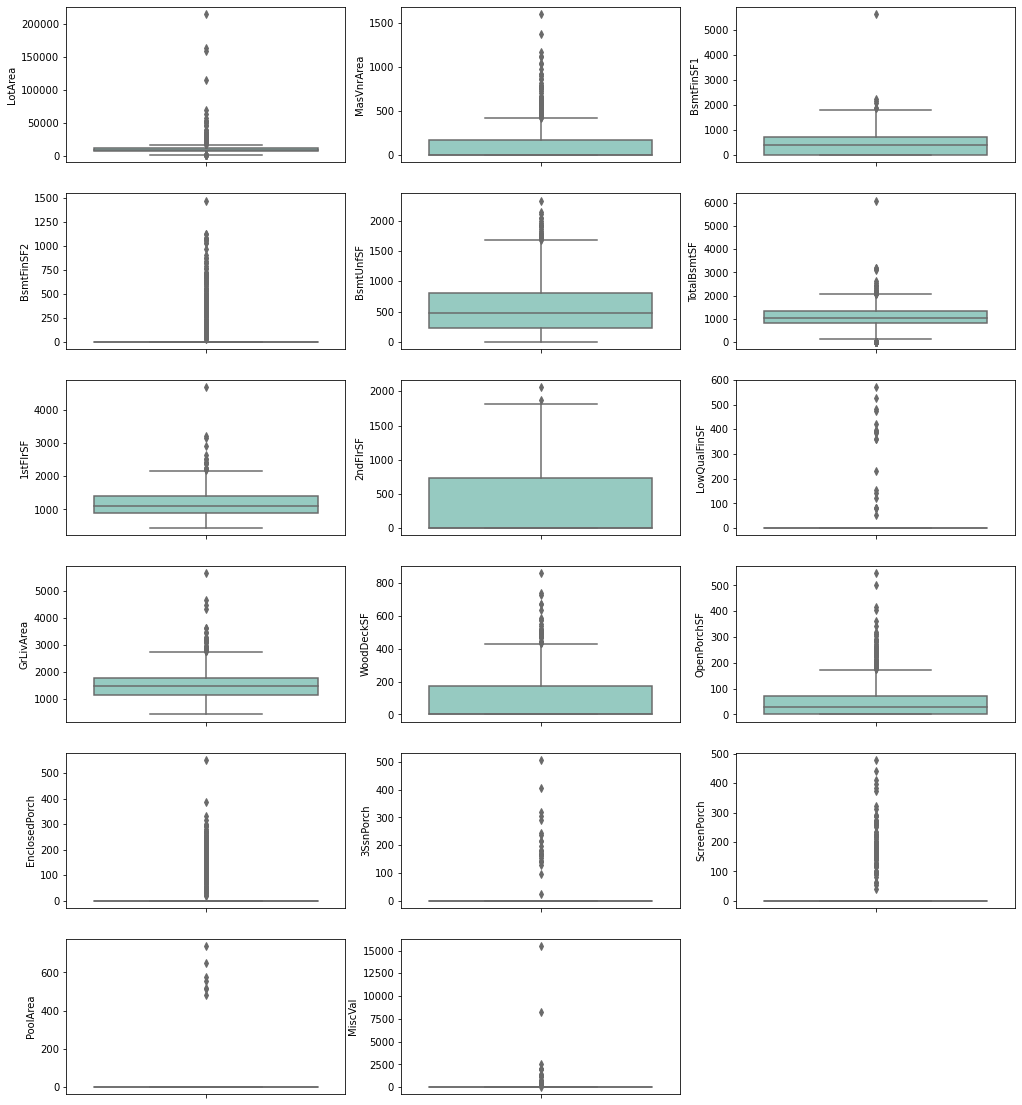

In [616]:
#Selected Features for Outlier treatment are LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,WoodDeckSF,OpenPorchSF,EnclosedPorch, 3SsnPorch , ScreenPorch,PoolArea, MiscVal.

plt.figure(figsize=(17, 20))
plt.subplot(6,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = df)
plt.subplot(6,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = df)
plt.subplot(6,3,3)
sns.boxplot(y = 'BsmtFinSF1', palette='Set3', data = df)
plt.subplot(6,3,4)
sns.boxplot(y = 'BsmtFinSF2', palette='Set3', data = df)
plt.subplot(6,3,5)
sns.boxplot(y = 'BsmtUnfSF', palette='Set3', data = df)
plt.subplot(6,3,6)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = df)
plt.subplot(6,3,7)
sns.boxplot(y = '1stFlrSF', palette='Set3', data = df)
plt.subplot(6,3,8)
sns.boxplot(y = '2ndFlrSF', palette='Set3', data = df)
plt.subplot(6,3,9)
sns.boxplot(y = 'LowQualFinSF', palette='Set3', data = df)
plt.subplot(6,3,10)
sns.boxplot(y = 'GrLivArea', palette='Set3', data = df)
plt.subplot(6,3,11)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = df)
plt.subplot(6,3,12)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = df)
plt.subplot(6,3,13)
sns.boxplot(y = 'EnclosedPorch', palette='Set3', data = df)
plt.subplot(6,3,14)
sns.boxplot(y = '3SsnPorch', palette='Set3', data = df)
plt.subplot(6,3,15)
sns.boxplot(y = 'ScreenPorch', palette='Set3', data = df)
plt.subplot(6,3,16)
sns.boxplot(y = 'PoolArea', palette='Set3', data = df)
plt.subplot(6,3,17)
sns.boxplot(y = 'MiscVal', palette='Set3', data = df)
plt.show()

In [617]:
# Removing Outliers
# from describe and Box plot we can conclude the percentage

# LotArea - 98%,MasVnrArea - 98%,BsmtFinSF1 - 99%,BsmtFinSF2 - 98%,BsmtUnfSF -99%,TotalBsmtSF-99%,1stFlrSF-99%,
# 2ndFlrSF -99%,LowQualFinSF - Drop column,GrLivArea - 99%,WoodDeckSF - 99%,OpenPorchSF -99%,EnclosedPorch - drop column,
# 3SsnPorch -drop column, ScreenPorch - drop column,PoolArea - drop column, MiscVal - drop column.

# Removing values beyond 98 and 99% for respective columns
df = df[df["LotArea"] <= df['LotArea'].quantile(0.98)]
df = df[df["MasVnrArea"] <= df['MasVnrArea'].quantile(0.98)]

df = df[df["BsmtFinSF1"] <= df['BsmtFinSF1'].quantile(0.99)]
df = df[df["BsmtFinSF2"] <= df['BsmtFinSF2'].quantile(0.98)]
df = df[df["BsmtUnfSF"] <= df['BsmtUnfSF'].quantile(0.99)]
df = df[df["TotalBsmtSF"] <= df['TotalBsmtSF'].quantile(0.99)]

df = df[df["1stFlrSF"] <= df['1stFlrSF'].quantile(0.99)]
df = df[df["2ndFlrSF"] <= df['2ndFlrSF'].quantile(0.99)]

df = df[df["GrLivArea"] <= df['GrLivArea'].quantile(0.99)]
df = df[df["WoodDeckSF"] <= df['WoodDeckSF'].quantile(0.99)]
df = df[df["OpenPorchSF"] <= df['OpenPorchSF'].quantile(0.99)]

df = df[df["WoodDeckSF"] <= df['2ndFlrSF'].quantile(0.99)]


# dropping columns
df.drop(['LowQualFinSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)

#### Bi-Variant Data Analysis

In [618]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold',
       'SaleType

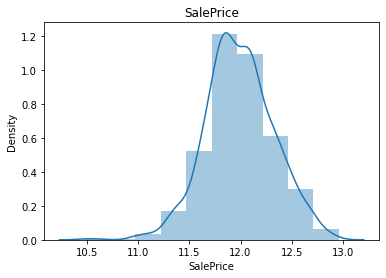

In [619]:
# Checking Target variable SalePrice
df['SalePrice'] = np.log1p(df['SalePrice'])

plt.title('SalePrice')
sns.distplot(df['SalePrice'], bins=10)
plt.show()

The target value seems to be normalized with some noise.

<Figure size 936x360 with 0 Axes>

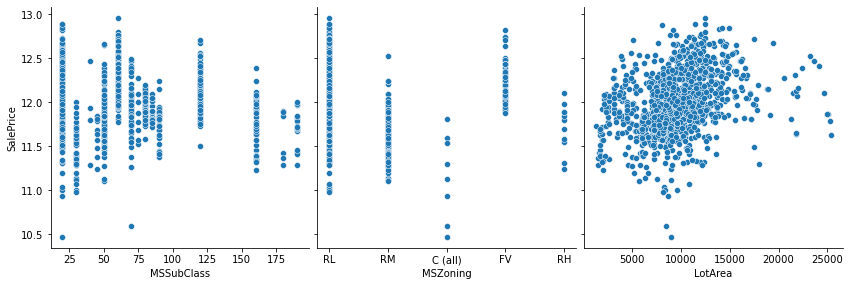

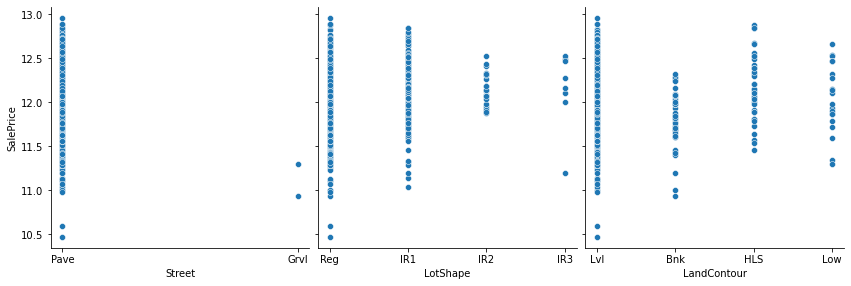

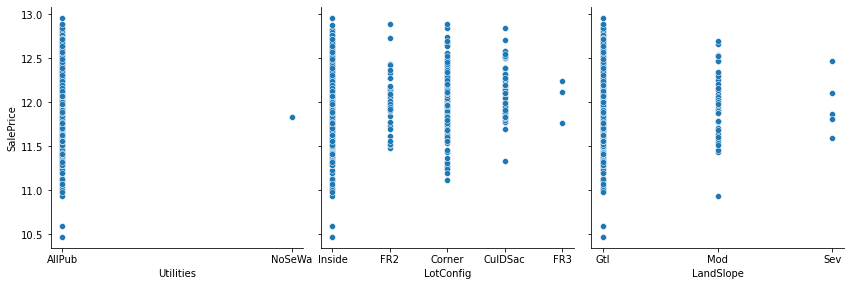

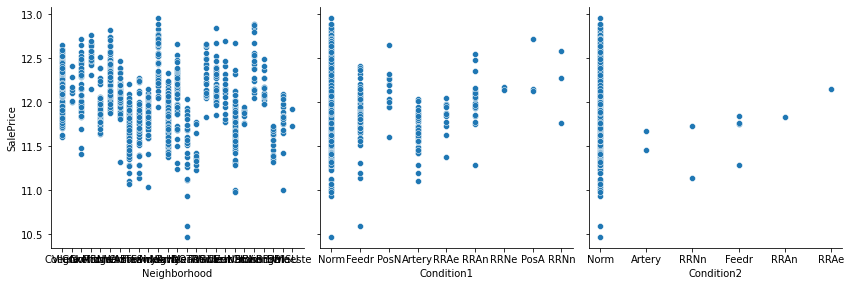

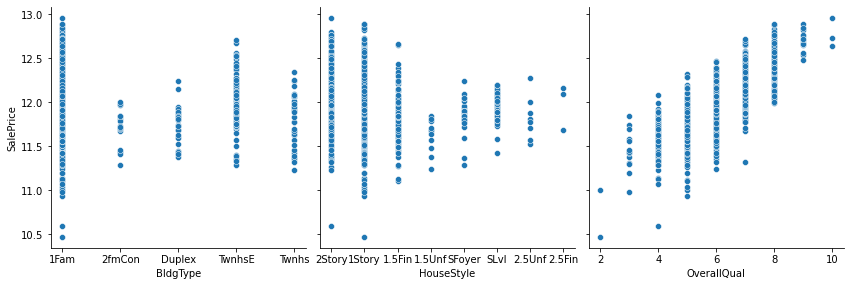

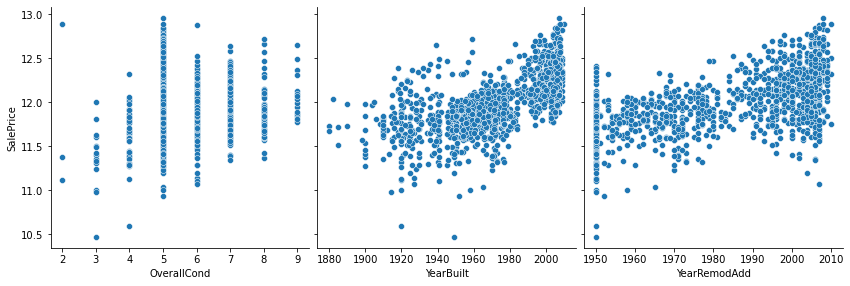

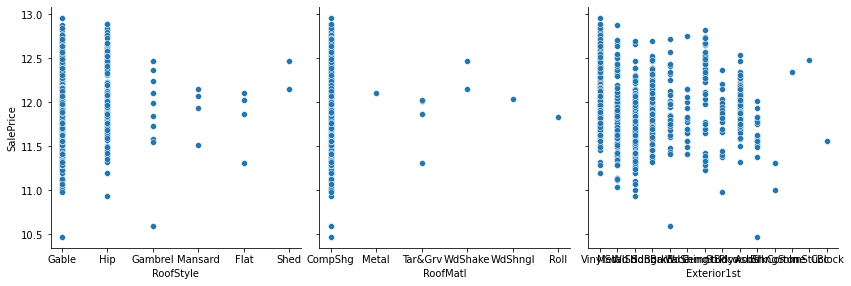

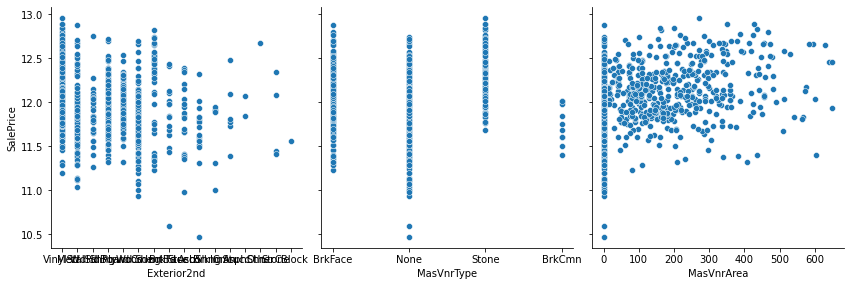

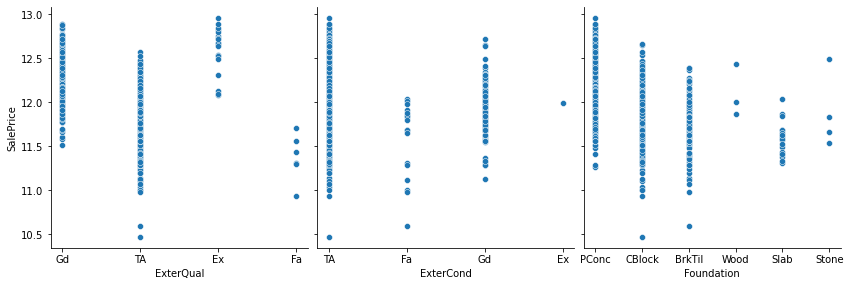

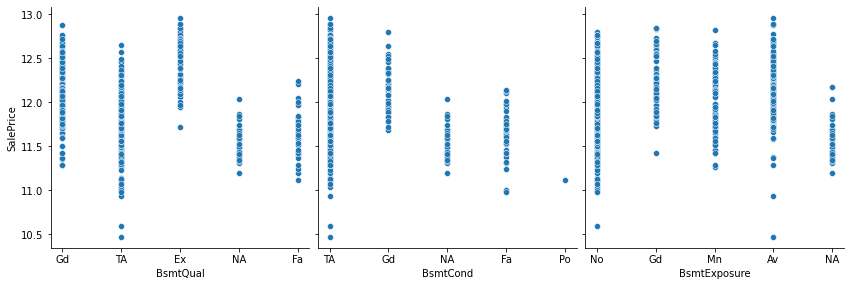

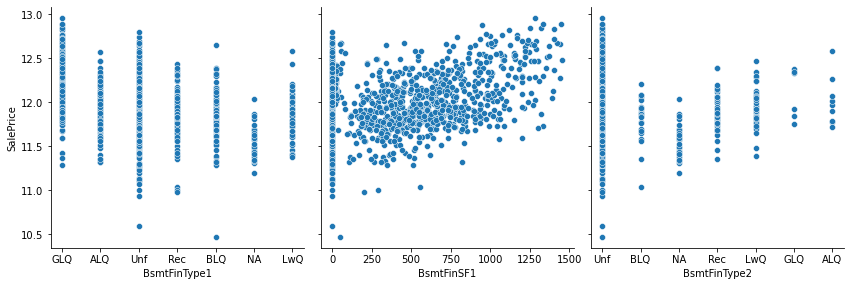

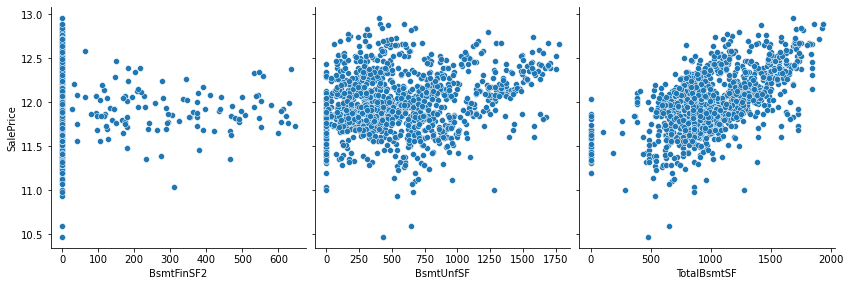

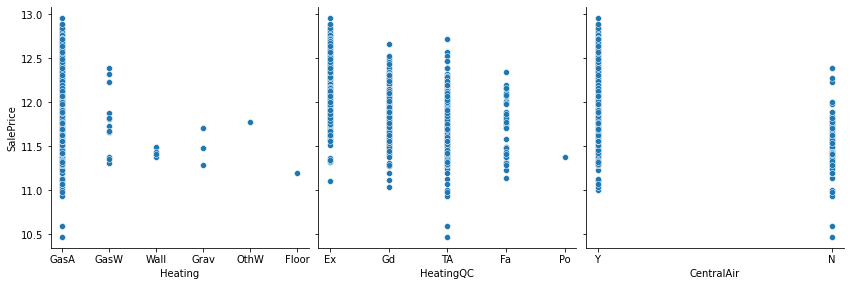

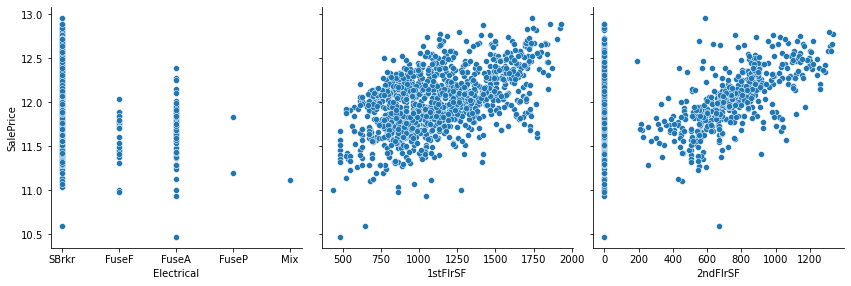

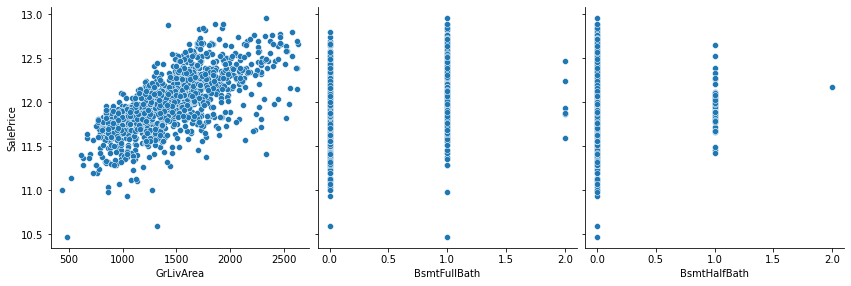

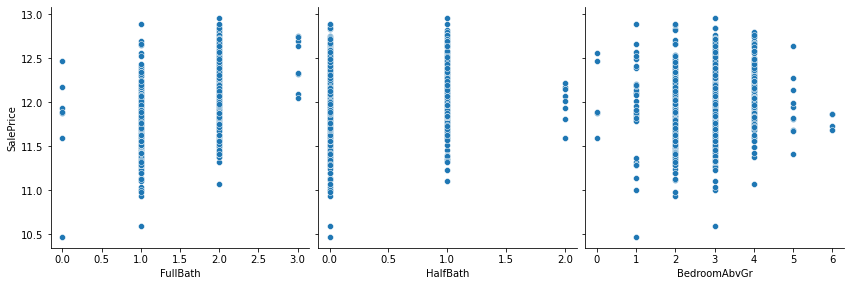

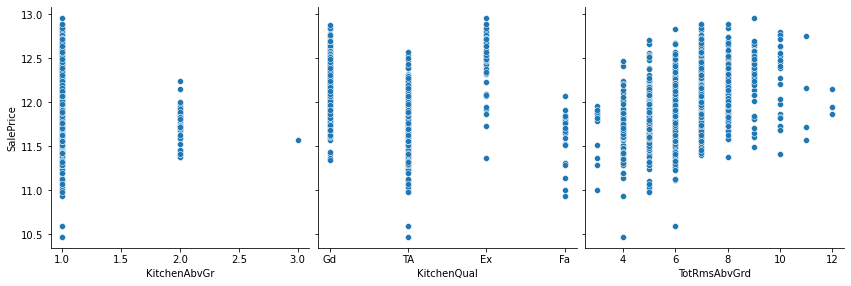

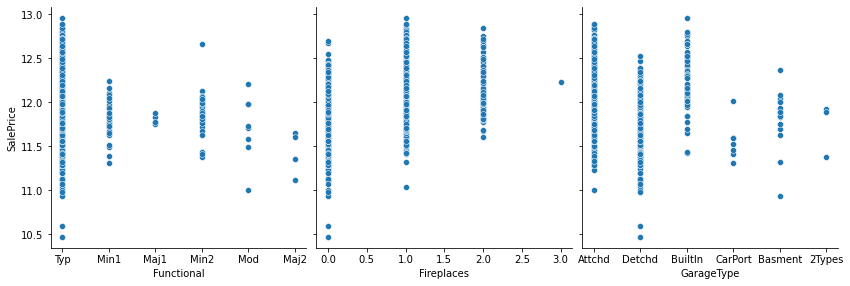

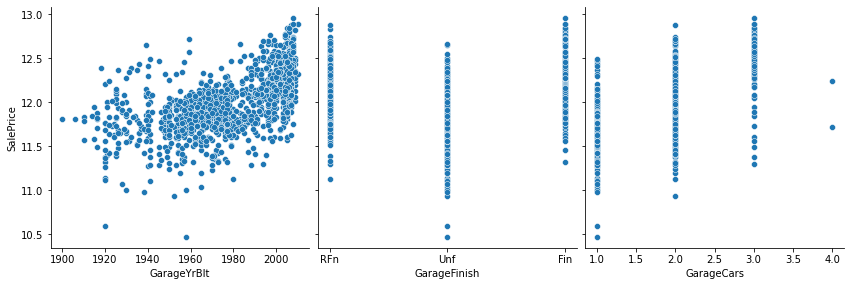

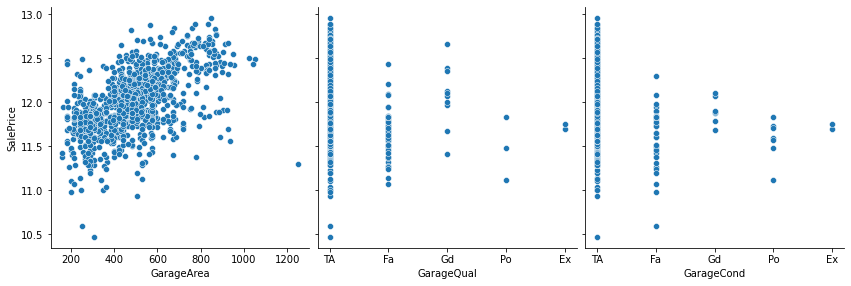

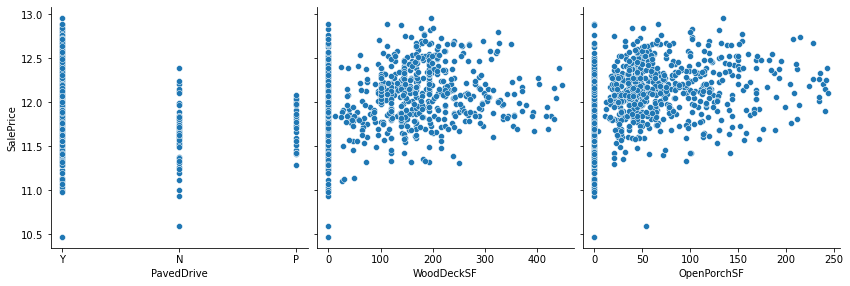

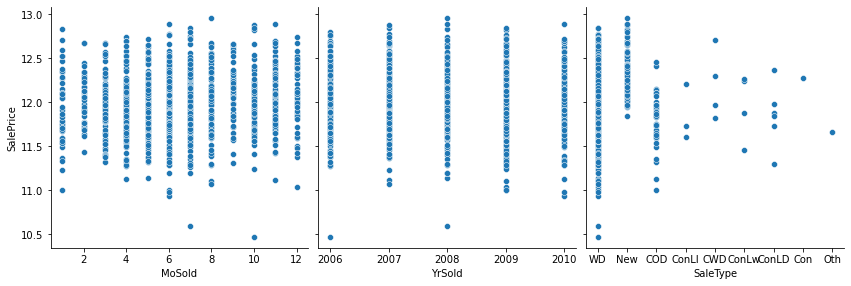

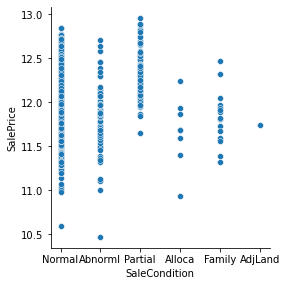

In [620]:
# Check the numerical values using pairplots

plt.figure(figsize=(13,5))
sns.pairplot(df, x_vars=['MSSubClass', 'MSZoning', 'LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['Street', 'LotShape','LandContour'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['Utilities', 'LotConfig', 'LandSlope'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['Neighborhood','Condition1', 'Condition2'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BldgType', 'HouseStyle', 'OverallQual'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['OverallCond', 'YearBuilt', 'YearRemodAdd'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['RoofStyle', 'RoofMatl','Exterior1st'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['Exterior2nd', 'MasVnrType', 'MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['ExterQual','ExterCond', 'Foundation'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtQual', 'BsmtCond', 'BsmtExposure'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['Heating', 'HeatingQC', 'CentralAir'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['Electrical','1stFlrSF', '2ndFlrSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['FullBath', 'HalfBath', 'BedroomAbvGr'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['KitchenAbvGr', 'KitchenQual','TotRmsAbvGrd'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['Functional', 'Fireplaces', 'GarageType'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['GarageYrBlt', 'GarageFinish', 'GarageCars'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['GarageArea', 'GarageQual', 'GarageCond'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['PavedDrive', 'WoodDeckSF', 'OpenPorchSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['MoSold', 'YrSold','SaleType'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['SaleCondition'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

Observations :<br>
    - 1stFlrSF, GrLivArea seems to be showing correlation towards right<br>
    - Rest of the variables are too scattered and hence can be understood during further analysis

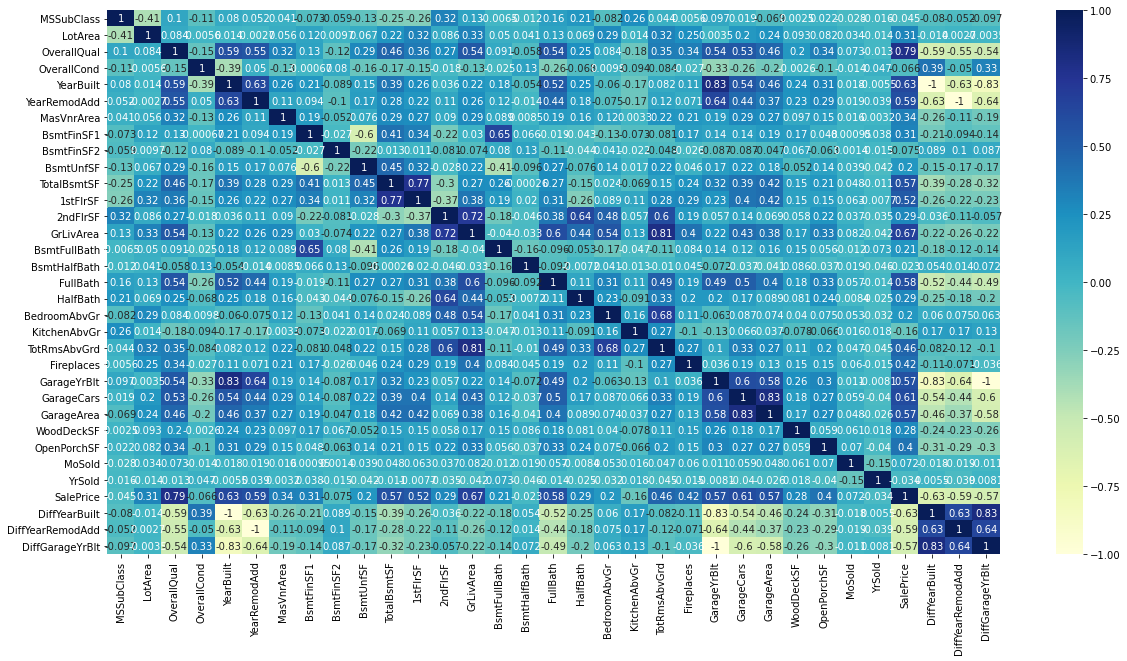

In [621]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [622]:
corr_feature_matrix = df.corr().abs()
high_corr_features=np.where(corr_feature_matrix>0.8)
high_corr_features=[(corr_feature_matrix.columns[x],corr_feature_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

In [623]:
high_corr_features

[('YearBuilt', 'GarageYrBlt'),
 ('GrLivArea', 'TotRmsAbvGrd'),
 ('GarageCars', 'GarageArea')]

**Summary**:
1. There plots above shows there exist some linear relationship between various columns and output column.
2. The heatmap is condensed however we do have collinearity in data

### Dumify Categorical Fields

In [624]:
df.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191 entries, 0 to 1457
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1191 non-null   object
 1   Street         1191 non-null   object
 2   LotShape       1191 non-null   object
 3   LandContour    1191 non-null   object
 4   Utilities      1191 non-null   object
 5   LotConfig      1191 non-null   object
 6   LandSlope      1191 non-null   object
 7   Neighborhood   1191 non-null   object
 8   Condition1     1191 non-null   object
 9   Condition2     1191 non-null   object
 10  BldgType       1191 non-null   object
 11  HouseStyle     1191 non-null   object
 12  RoofStyle      1191 non-null   object
 13  RoofMatl       1191 non-null   object
 14  Exterior1st    1191 non-null   object
 15  Exterior2nd    1191 non-null   object
 16  MasVnrType     1191 non-null   object
 17  ExterQual      1191 non-null   object
 18  ExterCond      1191 non-null

In [625]:
cat_col = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig',
'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual',
'ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
'BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual',
'Functional','GarageType','GarageFinish','GarageQual','GarageCond',
'PavedDrive','SaleType','SaleCondition']

In [626]:
# Dumifying features using a loop
for col in cat_col:
    dummies = pd.get_dummies(df[col], drop_first = True)
    dummies = dummies.add_prefix(f'{col}_')
    df = pd.concat([df, dummies], axis = 1)
    df.drop([col], axis = 1, inplace = True)

df.head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          60     8450            7            5       2003          2003   
1          20     9600            6            8       1976          1976   
2          60    11250            7            5       2001          2002   
3          70     9550            7            5       1915          1970   
4          60    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0       196.0         706           0        150          856       856   
1         0.0         978           0        284         1262      1262   
2       162.0         486           0        434          920       920   
3         0.0         216           0        540          756       961   
4       350.0         655           0        490         1145      1145   

   2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0       854       1710             1             0         2         1   
1         0       1262             0             1         2         0   
2       866       1786             1             0         2         1   
3       756       1717             1             0         1         0   
4      1053       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
0             3             1             8           0       2003.0   
1             3             1             6           1       1976.0   
2             3             1             6           1       2001.0   
3             3             1             7           1       1998.0   
4             4             1             9           1       2000.0   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  MoSold  YrSold  SalePrice  \
0           2         548           0           61       2    2008  12.247699   
1           2         460         298            0       5    2007  12.109016   
2           2         608           0           42       9    2008  12.317171   
3           3         642           0           35       2    2006  11.849405   
4           3         836         192           84      12    2008  12.429220   

   DiffYearBuilt  DiffYearRemodAdd  DiffGarageYrBlt  MSZoning_FV  MSZoning_RH  \
0             19                19             19.0            0            0   
1             46                46             46.0            0            0   
2             21                20             21.0            0            0   
3            107                52             24.0            0            0   
4             22                22             22.0            0            0   

   MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  \
0            1            0            1             0             0   
1            1            0            1             0             0   
2            1            0            1             0             0   
3            1            0            1             0             0   
4            1            0            1             0             0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0             1                0                0                1   
1             1                0                0                1   
2             0                0                0                1   
3             0                0                0                1   
4             0                0                0                1   

   Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                 0                  0              0              0   
1                 0                  0              1              0   
2                 0                  0              0              0   
3                 0                  0              0              0   
4                 0    

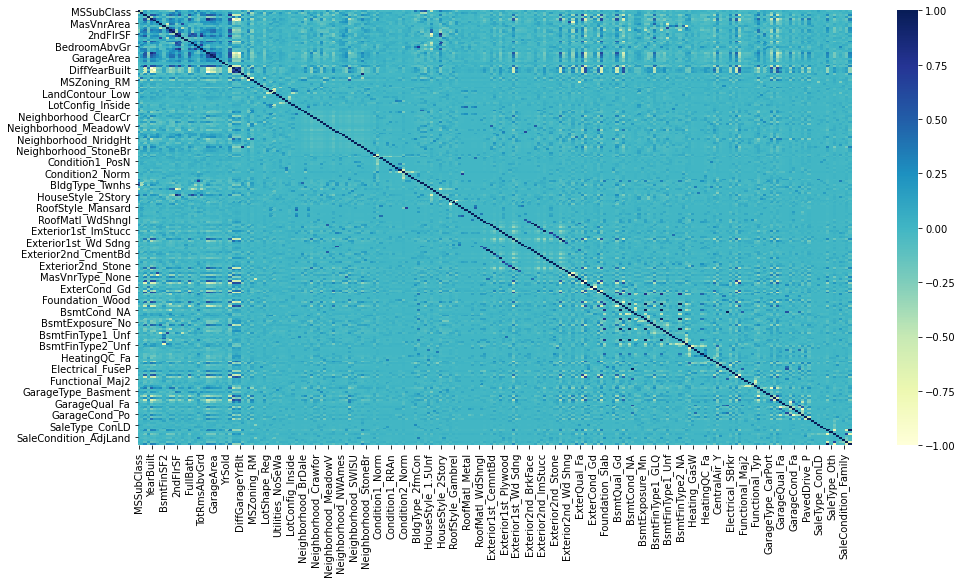

In [627]:
# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=False)
plt.show()

**Summary**:
1. The heatmap is very condensed and we do have a lot of collinearity in data, hence feature selection is necessary.

In [628]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191 entries, 0 to 1457
Columns: 227 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(29), uint8(194)
memory usage: 542.0 KB


All features in the data set are now numeric. 

## Train Test Split

In [629]:
# Putting all feature variable to X

X = df.drop(['SalePrice'], axis=1)
X.head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          60     8450            7            5       2003          2003   
1          20     9600            6            8       1976          1976   
2          60    11250            7            5       2001          2002   
3          70     9550            7            5       1915          1970   
4          60    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0       196.0         706           0        150          856       856   
1         0.0         978           0        284         1262      1262   
2       162.0         486           0        434          920       920   
3         0.0         216           0        540          756       961   
4       350.0         655           0        490         1145      1145   

   2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0       854       1710             1             0         2         1   
1         0       1262             0             1         2         0   
2       866       1786             1             0         2         1   
3       756       1717             1             0         1         0   
4      1053       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
0             3             1             8           0       2003.0   
1             3             1             6           1       1976.0   
2             3             1             6           1       2001.0   
3             3             1             7           1       1998.0   
4             4             1             9           1       2000.0   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  MoSold  YrSold  \
0           2         548           0           61       2    2008   
1           2         460         298            0       5    2007   
2           2         608           0           42       9    2008   
3           3         642           0           35       2    2006   
4           3         836         192           84      12    2008   

   DiffYearBuilt  DiffYearRemodAdd  DiffGarageYrBlt  MSZoning_FV  MSZoning_RH  \
0             19                19             19.0            0            0   
1             46                46             46.0            0            0   
2             21                20             21.0            0            0   
3            107                52             24.0            0            0   
4             22                22             22.0            0            0   

   MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  \
0            1            0            1             0             0   
1            1            0            1             0             0   
2            1            0            1             0             0   
3            1            0            1             0             0   
4            1            0            1             0             0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0             1                0                0                1   
1             1                0                0                1   
2             0                0                0                1   
3             0                0                0                1   
4             0                0                0                1   

   Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                 0                  0              0              0   
1                 0                  0              1              0   
2                 0                  0              0              0   
3                 0                  0              0              0   
4                 0                  0              1              0   

   LotConfig_Ins

In [630]:
# Putting response variable to y
y = df['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

#### Scaling the features

In [631]:
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=226)

#### split into train and test

In [632]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

## Linear Regression

In [633]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [634]:
print(lm.intercept_)
print(lm.coef_)

79081594.73394957
[-3.55401606e-02  1.20265898e-02  4.74638870e-02  3.77749150e-02
  4.73099371e+10  1.56241231e+11 -4.43706779e-04  1.98845795e+10
  5.37543126e+09  2.09606353e+10 -1.76499190e+10  3.18498611e-01
  4.25485611e-01 -3.07862282e-01  1.01375580e-02  1.76811218e-03
  1.94549561e-03  1.43432617e-02  4.87136841e-03 -9.77325439e-03
 -4.02832031e-03  1.30653381e-02  1.05916267e+10  1.84953213e-02
  9.26494598e-03  1.09508038e-02  3.24821472e-03 -2.09236145e-03
 -3.53431702e-03  4.73099371e+10  1.56241231e+11  1.05916267e+10
  1.09920502e-01  4.77647781e-02  2.05894470e-01  1.64590836e-01
  3.16810608e-03  5.19561768e-03  1.33514404e-04  2.42996216e-03
  7.55310059e-04 -5.30576706e-03 -4.13513184e-03 -7.76195526e-03
  3.45516205e-03 -9.08660889e-03  8.45909119e-04 -3.42082977e-03
  8.05091858e-03 -1.36115551e-02 -2.03943253e-03 -1.26361847e-03
  1.42927170e-02  5.76496124e-04 -1.09207630e-03  2.73590088e-02
 -1.37786865e-02 -3.53622437e-03  1.57880783e-03 -1.12981796e-02
  5.140

In [635]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 (train):', r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 (test) :', r2_test_lr)
metric.append(r2_test_lr)

res_train = y_train - y_pred_train
rss1_lr = np.sum(np.square(res_train))
print('RSS (train):', rss1_lr)
metric.append(rss1_lr)

res_test = y_test - y_pred_test
rss2_lr = np.sum(np.square(res_test))
print('RSS (test):', rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE (train):', mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE (test):', mse_test_lr)
metric.append(mse_test_lr**0.5)

R2 (train): 0.9465284191845196
R2 (test) : -6.745946420976499e+19
RSS (train): 4.932274096383592
RSS (test): 2.7635985108025197e+21
MSE (train): 0.005921097354602152
MSE (test): 7.7195489128562e+18


Since the train R2 score is 0.95 and -6.75 n test set, it shows that model has overfitted.

## Recursive feature elimination (RFE)

Since there are around 224 features, we will use RFE to get the best 50 features out of the 224 features and use the new features for further analysis

In [636]:



# running RFE
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [637]:
# Assign the columns selected by RFE to cols
col = X_train.columns[rfe.support_]

# assign the 90 features selected using RFE to a dataframe and view them
temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

Variable  rfe_support  rfe_ranking
0             MSSubClass         True            1
1            OverallQual         True            1
2            OverallCond         True            1
3              YearBuilt         True            1
4           YearRemodAdd         True            1
5             BsmtFinSF1         True            1
6             BsmtFinSF2         True            1
7              BsmtUnfSF         True            1
8            TotalBsmtSF         True            1
9               1stFlrSF         True            1
10              2ndFlrSF         True            1
11             GrLivArea         True            1
12            Fireplaces         True            1
13           GarageYrBlt         True            1
14            GarageCars         True            1
15         DiffYearBuilt         True            1
16      DiffYearRemodAdd         True            1
17       DiffGarageYrBlt         True            1
18           MSZoning_FV         True            1
19           MSZoning_RH         True            1
20           MSZoning_RL         True            1
21           MSZoning_RM         True            1
22  Neighborhood_Crawfor         True            1
23  Neighborhood_StoneBr         True            1
24       Condition2_RRAe         True            1
25       BldgType_Duplex         True            1
26     HouseStyle_1Story         True            1
27     HouseStyle_2Story         True            1
28    Exterior1st_CBlock         True            1
29   Exterior1st_CemntBd         True            1
30   Exterior1st_VinylSd         True            1
31   Exterior2nd_CmentBd         True            1
32   Exterior2nd_VinylSd         True            1
33           BsmtQual_NA         True            1
34           BsmtCond_NA         True            1
35           BsmtCond_Po         True            1
36       BsmtFinType1_NA         True            1
37       BsmtFinType2_NA         True            1
38        Electrical_Mix         True            1
39        KitchenQual_Gd         True            1
40        KitchenQual_TA         True            1
41        Functional_Typ         True            1
42      GarageFinish_Unf         True            1
43         GarageQual_Fa         True            1
44         GarageQual_Gd         True            1
45         GarageQual_TA         True            1
46         GarageCond_Fa         True            1
47         GarageCond_Gd         True            1
48         GarageCond_Po         True            1
49         GarageCond_TA         True            1

In [638]:
X_train_rfe = X_train[col]

In [639]:
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

## Model Building and Evaluation

In [640]:
# list pf alphas
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()
# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [641]:
#mean scores
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
13         2.0         -0.072688        -0.078535                1
15         4.0         -0.072860        -0.078537                2
14         3.0         -0.072777        -0.078541                3
12         1.0         -0.072575        -0.078563                4
11         0.9         -0.072564        -0.078569                5
16         5.0         -0.072947        -0.078573                6
10         0.8         -0.072554        -0.078575                7
9          0.7         -0.072544        -0.078583                8
8          0.6         -0.072534        -0.078591                9
7          0.5         -0.072522        -0.078602               10
6          0.4         -0.072508        -0.078615               11
17         6.0         -0.073027        -0.078617               12
5          0.3         -0.072492        -0.078631               13
4          0.2         -0.072484        -0.078654               14
18         7.0         -0.073102        -0.078664               15
3          0.1         -0.072479        -0.078694               16
19         8.0         -0.073189        -0.078744               17
2         0.01         -0.072475        -0.078751               18
1        0.001         -0.072475        -0.078759               19
0       0.0001         -0.072475        -0.078760               20
20         9.0         -0.073275        -0.078826               21
21        10.0         -0.073354        -0.078899               22
22          20         -0.073889        -0.079335               23
23          50         -0.074691        -0.079778               24
24         100         -0.075625        -0.080340               25
25         500         -0.085484        -0.089119               26

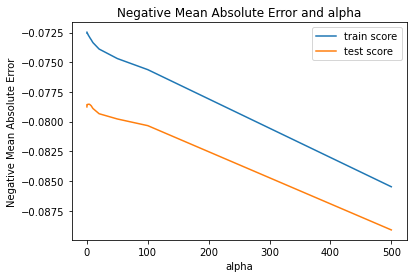

In [642]:
#plotting mean test and train scoes with alpha 
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

#plotting
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [643]:
# get the best estimator for lambda
ridge_model_cv.best_estimator_

Ridge(alpha=2.0)

In [644]:
# check the coefficient values with lambda = 6
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.02556736,  0.07136772,  0.04568889,  0.03476134,  0.0101862 ,
        0.03627176,  0.0044101 ,  0.00446347,  0.04750798,  0.07117067,
        0.08881145,  0.02811974,  0.01982761,  0.00230958,  0.03322715,
       -0.03476134, -0.0101862 , -0.00230958,  0.10989101,  0.03607236,
        0.17682826,  0.13958083,  0.02918761,  0.0157757 , -0.00262756,
       -0.02223155, -0.02720815, -0.01684372, -0.00325336, -0.00321249,
        0.03799889, -0.00325201, -0.02993051,  0.00350758,  0.00350758,
       -0.00239268,  0.00350758,  0.00350758, -0.00239268, -0.02469028,
       -0.02451246,  0.01713792, -0.01799296, -0.01698937, -0.00435218,
       -0.01154259, -0.01689964, -0.00376763, -0.00838506, -0.01235614])

In [645]:
#Check the mean squared error
mean_squared_error(y_test, ridge.predict(X_test))

0.013878763136323767

In [646]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

#Creating Metrics
met_ridge = []
r2_train = r2_score(y_train, y_pred_train)
print('R2 (train):', r2_train)
met_ridge.append(r2_train)

r2_test = r2_score(y_test, y_pred_test)
print('R2 (test):', r2_test)
met_ridge.append(r2_test)

rss_train = np.sum(np.square(y_train - y_pred_train))
print('RSS (train):', rss_train)
met_ridge.append(rss_train)

rss_test = np.sum(np.square(y_test - y_pred_test))
print('R2 (test):', rss_test)
met_ridge.append(rss_test)

mse_train = mean_squared_error(y_train, y_pred_train)
print('MSE (train):', mse_train)
met_ridge.append(mse_train ** 0.5)

mse_test = mean_squared_error(y_test, y_pred_test)
print('MSE (test):',mse_test)
met_ridge.append(mse_test ** 0.5)

R2 (train): 0.9109005324668228
R2 (test): 0.8787164981218794
RSS (train): 8.218627334620214
R2 (test): 4.968597202803909
MSE (train): 0.009866299321272766
MSE (test): 0.013878763136323767


In [647]:
# Put the Features and coefficienst in a dataframe
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

Features  Coefficient
0             MSSubClass      -0.0256
1            OverallQual       0.0714
2            OverallCond       0.0457
3              YearBuilt       0.0348
4           YearRemodAdd       0.0102
5             BsmtFinSF1       0.0363
6             BsmtFinSF2       0.0044
7              BsmtUnfSF       0.0045
8            TotalBsmtSF       0.0475
9               1stFlrSF       0.0712
10              2ndFlrSF       0.0888
11             GrLivArea       0.0281
12            Fireplaces       0.0198
13           GarageYrBlt       0.0023
14            GarageCars       0.0332
15         DiffYearBuilt      -0.0348
16      DiffYearRemodAdd      -0.0102
17       DiffGarageYrBlt      -0.0023
18           MSZoning_FV       0.1099
19           MSZoning_RH       0.0361
20           MSZoning_RL       0.1768
21           MSZoning_RM       0.1396
22  Neighborhood_Crawfor       0.0292
23  Neighborhood_StoneBr       0.0158
24       Condition2_RRAe      -0.0026
25       BldgType_Duplex      -0.0222
26     HouseStyle_1Story      -0.0272
27     HouseStyle_2Story      -0.0168
28    Exterior1st_CBlock      -0.0033
29   Exterior1st_CemntBd      -0.0032
30   Exterior1st_VinylSd       0.0380
31   Exterior2nd_CmentBd      -0.0033
32   Exterior2nd_VinylSd      -0.0299
33           BsmtQual_NA       0.0035
34           BsmtCond_NA       0.0035
35           BsmtCond_Po      -0.0024
36       BsmtFinType1_NA       0.0035
37       BsmtFinType2_NA       0.0035
38        Electrical_Mix      -0.0024
39        KitchenQual_Gd      -0.0247
40        KitchenQual_TA      -0.0245
41        Functional_Typ       0.0171
42      GarageFinish_Unf      -0.0180
43         GarageQual_Fa      -0.0170
44         GarageQual_Gd      -0.0044
45         GarageQual_TA      -0.0115
46         GarageCond_Fa      -0.0169
47         GarageCond_Gd      -0.0038
48         GarageCond_Po      -0.0084
49         GarageCond_TA      -0.0124

In [652]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot
ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.0256,
 'OverallQual': 0.0714,
 'OverallCond': 0.0457,
 'YearBuilt': 0.0348,
 'YearRemodAdd': 0.0102,
 'BsmtFinSF1': 0.0363,
 'BsmtFinSF2': 0.0044,
 'BsmtUnfSF': 0.0045,
 'TotalBsmtSF': 0.0475,
 '1stFlrSF': 0.0712,
 '2ndFlrSF': 0.0888,
 'GrLivArea': 0.0281,
 'Fireplaces': 0.0198,
 'GarageYrBlt': 0.0023,
 'GarageCars': 0.0332,
 'DiffYearBuilt': -0.0348,
 'DiffYearRemodAdd': -0.0102,
 'DiffGarageYrBlt': -0.0023,
 'MSZoning_FV': 0.1099,
 'MSZoning_RH': 0.0361,
 'MSZoning_RL': 0.1768,
 'MSZoning_RM': 0.1396,
 'Neighborhood_Crawfor': 0.0292,
 'Neighborhood_StoneBr': 0.0158,
 'Condition2_RRAe': -0.0026,
 'BldgType_Duplex': -0.0222,
 'HouseStyle_1Story': -0.0272,
 'HouseStyle_2Story': -0.0168,
 'Exterior1st_CBlock': -0.0033,
 'Exterior1st_CemntBd': -0.0032,
 'Exterior1st_VinylSd': 0.038,
 'Exterior2nd_CmentBd': -0.0033,
 'Exterior2nd_VinylSd': -0.0299,
 'BsmtQual_NA': 0.0035,
 'BsmtCond_NA': 0.0035,
 'BsmtCond_Po': -0.0024,
 'BsmtFinType1_NA': 0.0035,
 'BsmtFinType2_NA': 0.00

### RFE - Reduce Features count to 15

In [655]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [657]:
def find(x):
    return ridge_coeff_dict[x]

# Assign 10 features to a temp dataframe for further display in the bar plot
temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(15)
temp1_df

Features  rfe_support  rfe_ranking  Coefficient
12      MSZoning_RL         True            1       0.1768
13      MSZoning_RM         True            1       0.1396
10      MSZoning_FV         True            1       0.1099
6          2ndFlrSF         True            1       0.0888
0       OverallQual         True            1       0.0714
5          1stFlrSF         True            1       0.0712
4       TotalBsmtSF         True            1       0.0475
1       OverallCond         True            1       0.0457
3        BsmtFinSF1         True            1       0.0363
11      MSZoning_RH         True            1       0.0361
2         YearBuilt         True            1       0.0348
8        GarageCars         True            1       0.0332
7         GrLivArea         True            1       0.0281
14  BldgType_Duplex         True            1      -0.0222
9     DiffYearBuilt         True            1      -0.0348

In [658]:
#creating Metrics for ridge
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test)

met_ridge = []
r2_train = r2_score(y_train, y_pred_train)
print('R2 (train):', r2_train)
met_ridge.append(r2_train)

r2_test = r2_score(y_test, y_pred_test)
print('R2 (test):', r2_test)
met_ridge.append(r2_test)

rss_train = np.sum(np.square(y_train - y_pred_train))
print('RSS (train):', rss_train)
met_ridge.append(rss_train)

rss_test = np.sum(np.square(y_test - y_pred_test))
print('R2 (test):', rss_test)
met_ridge.append(rss_test)

mse_train = mean_squared_error(y_train, y_pred_train)
print('MSE (train):', mse_train)
met_ridge.append(mse_train ** 0.5)

mse_test = mean_squared_error(y_test, y_pred_test)
print('MSE (test):',mse_test)
met_ridge.append(mse_test ** 0.5)

R2 (train): 0.9109005324668228
R2 (test): 0.8787164981218794
RSS (train): 8.218627334620214
R2 (test): 4.968597202803909
MSE (train): 0.009866299321272766
MSE (test): 0.013878763136323767


<b> we able to see R2 score for Train and Test are good even with 15 features. </b>

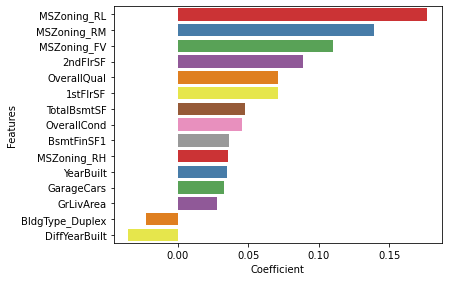

In [659]:
# bar plot to determine the variables that would affect pricing most using ridge regression
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

The above graph displays the top 15 variables based on the Ridge Regression model that are significant in predicting the price 
of a house.    <br>
BldgType_Duplex, DiffYearBuilt are Negative co-efficients and apart from that others are positive

#### Residual Analysis of the training data

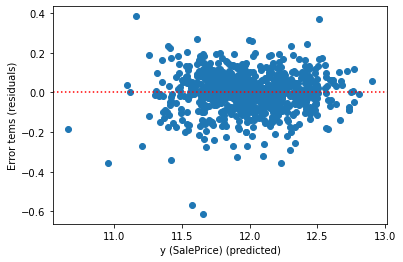

In [660]:
res_train = y_train - y_pred_train
plt.scatter(y_pred_train, res_train)
plt.axhline(y=0, color='r', linestyle=':')
plt.ylabel('Error tems (residuals)')
plt.xlabel('y (SalePrice) (predicted)')
plt.show()

Observations
- plot shows error terms not showing any constant patterns (increase or decrease)
- Error terms are randomly distributed and independent of each other.
- Error terms have constant variance (homoscedasticity)

<Figure size 432x432 with 0 Axes>

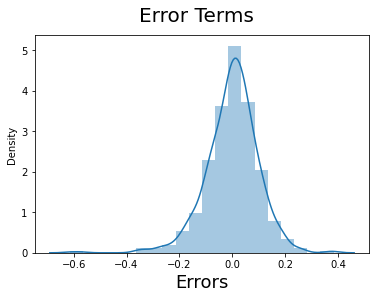

In [661]:
# plot a histogram of residuals
plt.figure(figsize=(6,6))
fig = plt.figure()
ax = plt.gca()
sns.distplot(res_train, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)               
plt.xlabel('Errors', fontsize = 18)  
plt.show()

<b> Error terms shows normal distribution <b>

Ridge Conclusion : Our R-square on test is 0.87 while it was 0.91 on the training dataset.

Below are the variables are significant in predicting the price of the house 

Positive Drivers
- MSZoning_RL - Zoning Classification Feature with Residential Low Density.
- MSZoning_RM - Zoning Classification Feature with Medium Density.
- MSZoning_FV - Zoning Classification Feature with FLoating Village Residentials.
- 2ndFlrSF - Second FLoor square feet.
- OverallQual - overall material and finish of the house.
- 1stFlrSF - First Floor square feet.
- TotalBsmtSF - Total square feet of basement area
- OverallCond - Overall condition of the house.
- BsmtFinSF1 - Type 1 finished sqaure foot
- MSZoning_RH - Zoning Classification Feature with Residential High Density.
- YearBuilt - Original Construction date.
- GarageCars - Size of garage in car capacity
- GRLivArea - Above grade (ground) living area square feet

Negative Drivers
- BldgType_Duplex - Type of dwelling is duplex
- DiffYearBuilt - Age of house



#### Lasso

In [662]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [663]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
1       0.0002         -0.072651        -0.078568                1
0       0.0001         -0.072575        -0.078582                2
2       0.0003         -0.072718        -0.078637                3
3       0.0004         -0.072837        -0.078688                4
4       0.0005         -0.073005        -0.078751                5
5        0.001         -0.073753        -0.079072                6
6        0.002         -0.075394        -0.080444                7
7        0.003         -0.076832        -0.081276                8
8        0.004         -0.077507        -0.081680                9
9        0.005         -0.077970        -0.081882               10
10        0.01         -0.080687        -0.084188               11

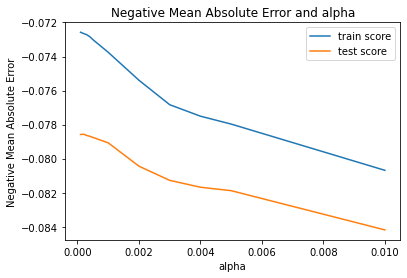

In [664]:
# plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [665]:
# get the best estimator for lambda
lasso_model_cv.best_estimator_

Lasso(alpha=0.0002)

In [666]:
# check the coefficient values with lambda = 0.0004
alpha = 0.0002
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 
lasso.coef_

array([-2.51445180e-02,  7.17427924e-02,  4.53226649e-02,  6.73474675e-02,
        1.98385273e-02,  3.20503809e-02,  3.06185268e-03, -0.00000000e+00,
        5.03036120e-02,  9.23876932e-02,  1.16586627e-01,  0.00000000e+00,
        1.97604376e-02,  4.44328511e-03,  3.32785866e-02, -4.87482316e-04,
       -4.54848246e-05, -5.02334313e-05,  1.14955128e-01,  3.82109160e-02,
        1.86150852e-01,  1.47298826e-01,  2.89344856e-02,  1.55752005e-02,
       -2.47515404e-03, -2.18907015e-02, -2.59830182e-02, -1.62426101e-02,
       -3.17136928e-03, -5.07986134e-03,  2.85420569e-02, -7.63880214e-04,
       -1.96558853e-02,  1.30521795e-02,  0.00000000e+00, -3.54868572e-03,
        4.40517602e-05,  4.13504965e-18, -9.28997122e-09, -2.34046661e-02,
       -2.33385521e-02,  1.65570506e-02, -1.84652313e-02, -8.18571144e-03,
       -0.00000000e+00, -1.08992815e-03, -1.13824042e-02, -1.16299346e-03,
       -5.74024220e-03, -5.92502667e-03])

In [667]:
# Check the mean squared error
mean_squared_error(y_test, lasso.predict(X_test))

0.013928380651602871

In [668]:
# Put the shortlisted Features and coefficienst in a dataframe
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0             MSSubClass      -0.0251
1            OverallQual       0.0717
2            OverallCond       0.0453
3              YearBuilt       0.0673
4           YearRemodAdd       0.0198
5             BsmtFinSF1       0.0321
6             BsmtFinSF2       0.0031
7            TotalBsmtSF       0.0503
8               1stFlrSF       0.0924
9               2ndFlrSF       0.1166
10            Fireplaces       0.0198
11           GarageYrBlt       0.0044
12            GarageCars       0.0333
13         DiffYearBuilt      -0.0005
14       DiffGarageYrBlt      -0.0001
15           MSZoning_FV       0.1150
16           MSZoning_RH       0.0382
17           MSZoning_RL       0.1862
18           MSZoning_RM       0.1473
19  Neighborhood_Crawfor       0.0289
20  Neighborhood_StoneBr       0.0156
21       Condition2_RRAe      -0.0025
22       BldgType_Duplex      -0.0219
23     HouseStyle_1Story      -0.0260
24     HouseStyle_2Story      -0.0162
25    Exterior1st_CBlock      -0.0032
26   Exterior1st_CemntBd      -0.0051
27   Exterior1st_VinylSd       0.0285
28   Exterior2nd_CmentBd      -0.0008
29   Exterior2nd_VinylSd      -0.0197
30           BsmtQual_NA       0.0131
31           BsmtCond_Po      -0.0035
32        KitchenQual_Gd      -0.0234
33        KitchenQual_TA      -0.0233
34        Functional_Typ       0.0166
35      GarageFinish_Unf      -0.0185
36         GarageQual_Fa      -0.0082
37         GarageQual_TA      -0.0011
38         GarageCond_Fa      -0.0114
39         GarageCond_Gd      -0.0012
40         GarageCond_Po      -0.0057
41         GarageCond_TA      -0.0059

In [669]:
# Put the Features and Coefficients in dictionary
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.02514451800669989,
 'OverallQual': 0.07174279236727533,
 'OverallCond': 0.04532266490491522,
 'YearBuilt': 0.067347467521,
 'YearRemodAdd': 0.019838527302579626,
 'BsmtFinSF1': 0.03205038093281289,
 'BsmtFinSF2': 0.0030618526773197453,
 'BsmtUnfSF': -0.0,
 'TotalBsmtSF': 0.05030361199663137,
 '1stFlrSF': 0.0923876932311156,
 '2ndFlrSF': 0.1165866268496248,
 'GrLivArea': 0.0,
 'Fireplaces': 0.019760437587777808,
 'GarageYrBlt': 0.004443285110716186,
 'GarageCars': 0.033278586577481735,
 'DiffYearBuilt': -0.0004874823158029846,
 'DiffYearRemodAdd': -4.54848245600504e-05,
 'DiffGarageYrBlt': -5.023343132791734e-05,
 'MSZoning_FV': 0.11495512800007976,
 'MSZoning_RH': 0.0382109160151443,
 'MSZoning_RL': 0.18615085152949448,
 'MSZoning_RM': 0.14729882606116163,
 'Neighborhood_Crawfor': 0.028934485616434153,
 'Neighborhood_StoneBr': 0.015575200530252664,
 'Condition2_RRAe': -0.00247515404001386,
 'BldgType_Duplex': -0.021890701514260882,
 'HouseStyle_1Story': -0.02598301818

#### RFE

In [670]:
# Do an RFE to minimise the features to 15
X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)
# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [672]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot
temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(15)
temp2_df

Features  rfe_support  rfe_ranking  Coefficient
11          MSZoning_RL         True            1     0.186151
12          MSZoning_RM         True            1     0.147299
6              2ndFlrSF         True            1     0.116587
9           MSZoning_FV         True            1     0.114955
5              1stFlrSF         True            1     0.092388
0           OverallQual         True            1     0.071743
2             YearBuilt         True            1     0.067347
4           TotalBsmtSF         True            1     0.050304
1           OverallCond         True            1     0.045323
10          MSZoning_RH         True            1     0.038211
7            GarageCars         True            1     0.033279
3            BsmtFinSF1         True            1     0.032050
14  Exterior1st_VinylSd         True            1     0.028542
8         DiffYearBuilt         True            1    -0.000487
13      BldgType_Duplex         True            1    -0.021891

In [674]:
#creating Metrics for ridge
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test)

met_lasso = []
r2_train = r2_score(y_train, y_pred_train)
print('R2 (train):', r2_train)
met_lasso.append(r2_train)

r2_test = r2_score(y_test, y_pred_test)
print('R2 (test):', r2_test)
met_lasso.append(r2_test)

rss_train = np.sum(np.square(y_train - y_pred_train))
print('RSS (train):', rss_train)
met_lasso.append(rss_train)

rss_test = np.sum(np.square(y_test - y_pred_test))
print('R2 (test):', rss_test)
met_lasso.append(rss_test)

mse_train = mean_squared_error(y_train, y_pred_train)
print('MSE (train):', mse_train)
met_lasso.append(mse_train ** 0.5)

mse_test = mean_squared_error(y_test, y_pred_test)
print('MSE (test):',mse_test)
met_lasso.append(mse_test ** 0.5)

R2 (train): 0.9109752149521062
R2 (test): 0.878282901413842
RSS (train): 8.211738544687329
R2 (test): 4.986360273273828
MSE (train): 0.009858029465410959
MSE (test): 0.013928380651602871


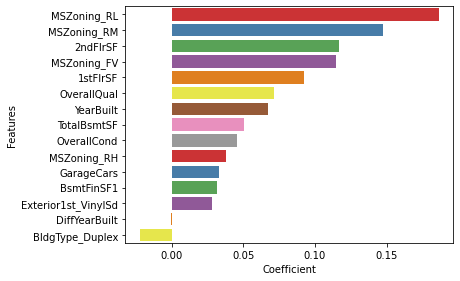

In [675]:
# bar plot to determine the variables that would affect pricing most using ridge regression
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

The above graph displays the top 15 variables based on the Lasso Regression model that are significant in predicting the price 
of a house.  

#### Residual Analysis of the training data

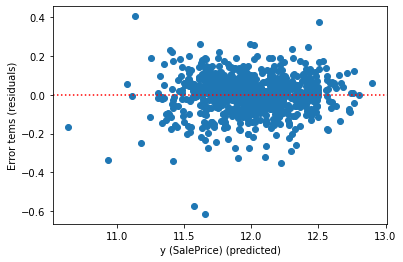

In [676]:
res_train = y_train - y_pred_train
plt.scatter(y_pred_train, res_train)
plt.axhline(y=0, color='r', linestyle=':')
plt.ylabel('Error tems (residuals)')
plt.xlabel('y (SalePrice) (predicted)')
plt.show()

Observations
- plot shows error terms not showing any constant patterns (increase or decrease)
- Error terms are randomly distributed and independent of each other.
- Error terms have constant variance (homoscedasticity)

<Figure size 432x432 with 0 Axes>

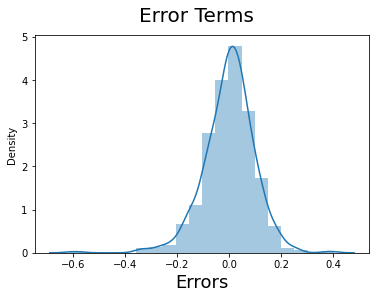

In [677]:
# plot a histogram of residuals
plt.figure(figsize=(6,6))
fig = plt.figure()
ax = plt.gca()
sns.distplot(res_train, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)               
plt.xlabel('Errors', fontsize = 18)  
plt.show()

<b> Error terms shows normal distribution <b>

Lasso Conclusion : Our R-square on test is 0.87 while it was 0.91 on the training dataset.

Below are the variables are significant in predicting the price of the house 

Positive Drivers
- MSZoning_RL - Zoning Classification Feature with Residential Low Density.
- MSZoning_RM - Zoning Classification Feature with Medium Density.
- 2ndFlrSF - Second FLoor square feet.
- MSZoning_FV - Zoning Classification Feature with FLoating Village Residentials.
- 1stFlrSF - First Floor square feet.
- OverallQual - overall material and finish of the house.
- YearBuilt - Original Construction date.
- TotalBsmtSF - Total square feet of basement area
- OverallCond - Overall condition of the house.
- MSZoning_RH - Zoning Classification Feature with Residential High Density.
- GarageCars - Size of garage in car capacity
- BsmtFinSF1 - Type 1 finished sqaure foot
- Exterior1st_VinylSd - Exterior covering on house with VinylSd	Vinyl Siding

Negative Drivers
- DiffYearBuild -  Age of the house
- bldgType_Duplex - Above grade (ground) living area square feet


In [685]:
metrics = pd.DataFrame({'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 'Lasso Alpha = 0.0002': np.round(met_lasso,4), 'Ridge Alpha = 2' : np.round(met_ridge,4)})

metrics

Metric  Lasso Alpha = 0.0002  Ridge Alpha = 2
0  R2 Score (Train)                0.9110           0.9109
1   R2 Score (Test)                0.8783           0.8787
2       RSS (Train)                8.2117           8.2186
3        RSS (Test)                4.9864           4.9686
4       MSE (Train)                0.0993           0.0993
5        MSE (Test)                0.1180           0.1178

## Final Conclusion :

- The optimal lambda value in case of Ridge and Lasso is as below:
    - Ridge - 2
    - Lasso - 0.0002
    
- The Mean Squared error in case of Ridge and Lasso are:
    - Ridge - 0.0138
    - Lasso - 0.0139

- The Mean Squared Error of Lasso is slightly higher than that of Ridge

- Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a 
  better edge over Ridge.


- Hence based on Lasso, the factors that generally affect the increase in price are the Zoning classification, first and second floor swuare feet, Overall quality and condition of the house, Original construction date, Total basement area in square feet and the Basement finished square feet area, Size of the Garage Capacity,  

- Age of house and Duplex above grade living area square feet negative effect on price.
